<b>Name: Aishwarya Bhavsar<b><br>
<b>CSULB ID: 029371509<b><br>
<b>CECS 551 - Assignment 5<b><br>

<b>Design neural networks to classify hand written numbers using keras library, however,do not include convolutional layers.<b>



<font color='red'><b>(a) Design neural networks and implement them.<b></font> <br>

• Find Assignment 5 mnist.ipynb and mnist.zip.<br>
• train X and test X are list of intensities in 8-bit gray scale of 28 × 28 images.<br>
• train y and test y are list of integers which are the classes of the corresponding images.<br>
• The objective of the networks is classifying images into 0 to 9

**Import Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam
from keras import  backend as K


**Import & Load Dataset**<br>
<b>Count the number of Unique train & test labels.<b>

In [2]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


11501568/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


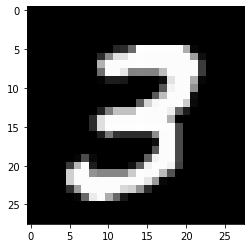

3


In [3]:
import matplotlib.pyplot as plt
import numpy as np

id = 7

image = np.array(x_train[id], dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# print(X_train[id])
print(y_train[id])

**Import keras libraries and packages**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

**Compute the number of labels**

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))

<b>One Hot Encoding <br> <br>One Hot Encoding is a common way of preprocessing categorical features for machine learning models.<br> This type of encoding creates a new binary feature for each possible category and assigns a value of 1 to the feature of each sample that corresponds to its original category. <b>

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

<b>Resize & Normalize<b><br>
We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.<br>

We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.<br>

A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.



In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

<font color='red'><b>(b) Split the training dataset into sub training and validation sets randomly.<b></font> <br><br> Use 1/6 of training dataset as validation set. Use the ‘accuracy’ as metric. Please repeat 10 times of random split for each hyper-parameters and architecture, and aggregate (average) the accuracy.<b>

<b>Splitting of dataset : Validation set = 1/6th of training data<b>

In [ ]:
from sklearn.model_selection import train_test_split
x_subtrain, x_valid, y_subtrain, y_valid = train_test_split(x_train, y_train, test_size=0.16,random_state=42)


<font color='red'><b>(c) Optimizer evaluation<b></font> <br><br>
• Implement a neural network which has single hidden layer with 32 units. Using the network, find best hyper-parameters of the following optimizers; SGD,RMSprop, Adam, Adagrad.<br>
• Train the network with the training dataset (not sub training) with the best
hyper-parameters of each optimizer.<br>
• For each optimizer, report test accuracy using the test dataset.<b>

<b> 1. Train Model using <font color = 'blue'>ADAM optimiser.<b> 

In [ ]:
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name="Adam")
def create_model():
  model = Sequential()
  model.add(Dense(32, input_dim = num_pixels, activation = 'relu'))
  model.compile(Adam(lr=0.01), loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


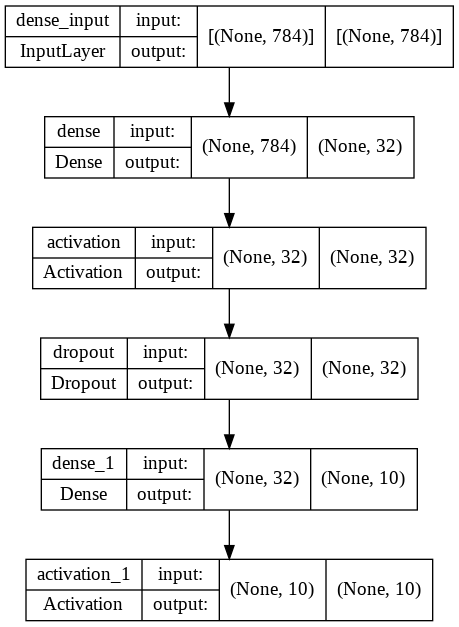

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

<b>Compile the model using ADAM Optimiser<b>

In [ ]:
batch_size = 128
hidden_units = 32
dropout = 0.45
# model is a 1-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('softmax'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=batch_size)

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 1.0270 - accuracy: 0.6342
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 1.0125 - accuracy: 0.6402
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.9924 - accuracy: 0.6596
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.9653 - accuracy: 0.6782
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.9431 - accuracy: 0.6845
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.9162 - accuracy: 0.6991
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.8807 - accuracy: 0.7114
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.8719 - accuracy: 0.7065
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.8546 - accuracy: 0.7102
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.8439 - accura

<b>Model Evaluation - Training Set<b>

In [ ]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1875/1875 [==============================] - 5s 2ms/step - loss: 0.1443 - accuracy: 0.9597
Accuracy: 95.97


<b>Model Evaluation - Testing Set<b>

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2215 - accuracy: 0.9407
Accuracy: 94.07


<b> 2. Train Model using <font color = 'blue'>ADAGRAD optimiser.<b>

In [ ]:
from keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad

tf.keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.1, epsilon=1e-07, name="Adagrad")
def create_model():
  model = Sequential()
  model.add(Dense(32, activation='relu'))
  model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
  return model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


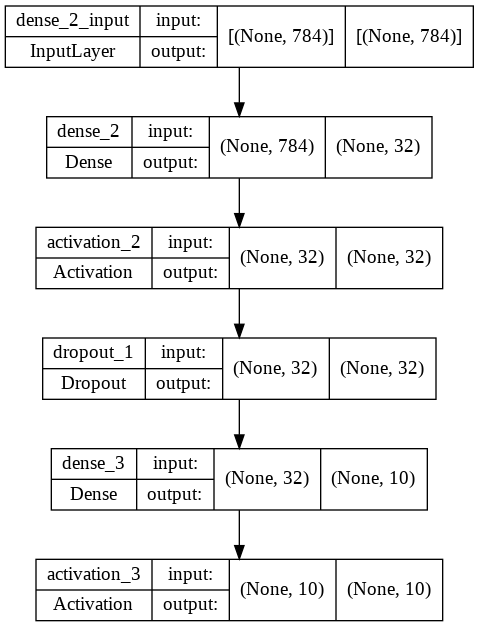

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

<b>Compile the model using ADAGRAD Optimiser<b>

In [ ]:
batch_size = 128
hidden_units = 32
dropout = 0.45
# model is a 1-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('softmax'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=batch_size)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 2.3035 - accuracy: 0.1010
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 2.3003 - accuracy: 0.1109
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2974 - accuracy: 0.1216
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2946 - accuracy: 0.1344
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2914 - accuracy: 0.1456
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2882 - accuracy: 0.1568
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2846 - accuracy: 0.1761
Epoch 8/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2815 - accuracy: 0.1883
Epoch 9/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2776 - accuracy: 0.2064
Epoch 10/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2740 - accura

<b>Model Evaluation - Training Set<b>

In [ ]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1875/1875 [==============================] - 3s 2ms/step - loss: 1.8078 - accuracy: 0.5180
Accuracy: 51.80


<b>Model Evaluation - Testing Set<b>

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.8066 - accuracy: 0.5158
Accuracy: 51.58


<b> 3. Train Model using <font color = 'blue'>SGD optimiser.<b>

In [ ]:
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")
def create_model():
  model3 = Sequential()
  model3.add(Dense(32, activation='relu'))
  model3.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return model

In [ ]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                25120     
                                                                 
 activation_48 (Activation)  (None, 32)                0         
                                                                 
 dropout_24 (Dropout)        (None, 32)                0         
                                                                 
 dense_49 (Dense)            (None, 10)                330       
                                                                 
 activation_49 (Activation)  (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


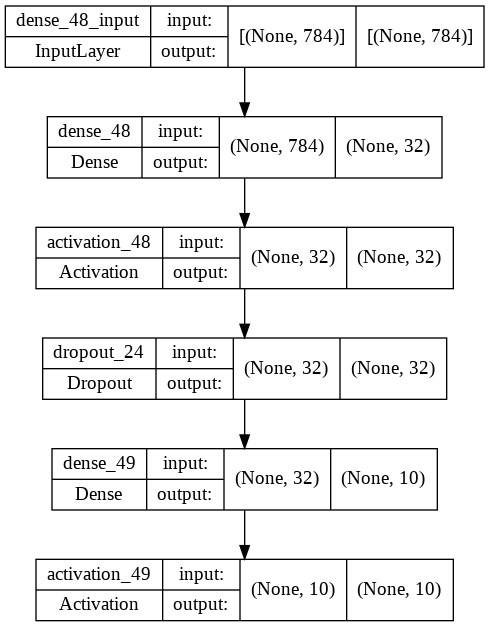

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

<b>Compile the model using SGD Optimiser<b>

In [ ]:
batch_size = 128
hidden_units = 32
dropout = 0.1
# model is a 1-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('softmax'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('relu'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 2.4266 - accuracy: 0.0972
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 2.2554 - accuracy: 0.1036
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 2.1627 - accuracy: 0.2113
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 2.0246 - accuracy: 0.3630
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 1.8776 - accuracy: 0.3981
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 1.7286 - accuracy: 0.3512
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 1.8436 - accuracy: 0.2167
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 1.7188 - accuracy: 0.2004
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 1.5937 - accuracy: 0.3601
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 1.5261 - accuracy: 0.2797

<b>Model Evaluation - Training Set<b>

In [ ]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1875/1875 [==============================] - 3s 2ms/step - loss: 1.2326 - accuracy: 0.5698
Accuracy: 56.98


<b>Model Evaluation - Testing Set<b>

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.2389 - accuracy: 0.5749
Accuracy: 57.49


<b> 4. Train Model using <font color = 'blue'>RMSprop optimiser.<b>

In [ ]:
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
tf.keras.optimizers.RMSprop(learning_rate=0.005, rho=0.2, momentum=0.9, epsilon=1e-07, centered=False, name="RMSprop")
def create_model():
  model = Sequential()
  model.add(Dense(32, activation='relu'))
  model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
  return model

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 32)                25120     
                                                                 
 activation_62 (Activation)  (None, 32)                0         
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_63 (Dense)            (None, 10)                330       
                                                                 
 activation_63 (Activation)  (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


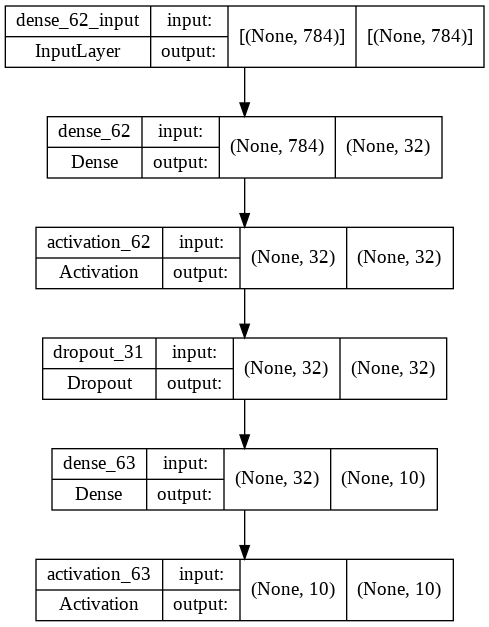

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

<b>Compile the model using RMSprop Optimiser<b>

In [ ]:
batch_size = 128
hidden_units = 32
dropout = 0.45
# model is a 1-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('relu'))
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.2537
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0987


<b>Model Evaluation - Training Set<b>

In [ ]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987
Accuracy: 9.87


<b>Model Evaluation - Testing Set<b>

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0761
Accuracy: 7.61


<b><font color='red'>(d) Architecture evaluation<b></font><br><br>
• Pick the best optimizer and it’s hyper-parameters from the previous part.<br>
• Using sub training and validation datasets, find the best architecture in terms of the number of layers, the number of units, and activation functions.<br>
• Report 3 best architectures in terms of test accuracy. Please include architecture diagram as shown in Figure 1.

<table>
         <tr>
            <th>Optimisers</th>
            <th>Training Accuracy</th>
            <th>Testing Accuracy</th>
         </tr>
</table>   
<table>
         <tr>
            <th>Adam</th>
            <th>95.97%</th>
            <th>94.07%</th>
         </tr>
</table> 
<table>
         <tr>
            <th>Adagrad</th>
            <th>51.80%</th>
            <th>51.58%</th>
         </tr>
</table>    
<table>    
         <tr>
            <th>SGD</th>
            <th>56.98%</th>
            <th>57.49%</th>
         </tr>
</table>
<table>
         <tr>
            <th>RMSprop</th>
            <th>9.87%</th>
            <th>7.61%</th>
         </tr>
</table>


<Font color='red'><b>Best Optimiser For Architecture Evaluation 1 is Adam</font></b><br>
    <font color='blue'>Hyper parameters used for Adam </font><br>
    1. learning_rate=0.01,<br>
    2.beta_1=0.9, <br>
    3.beta_2=0.999, <br>
    4.epsilon=1e-07, <br>
    5.amsgrad=False, <br>
    6.Activation Function : relu & softmax<br>
    7. Number Of Hidden Units : 32<br>
    8. Loss : Catergorical_crossentropy<br>
    9. Metrics: Accuracy<br>

<font color = 'red'><b>Architecture 1 Diagram</font><b>

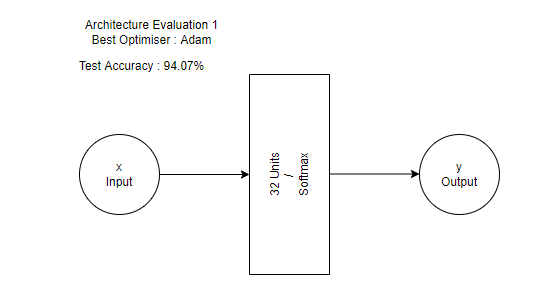